In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 8
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
#plt.rcParams['mathtext.fallback'] = 'None'

In [3]:
from Bio import Phylo
from io import StringIO

tree = '''(((((((((((((((((dm:0.054203,
                (droSim:0.02131,
                droSec:0.022797):0.024262):0.058501,
               (droYak:0.088966,
               droEre:0.077153):0.025438):0.181996,
              (droBia:0.126739,
              droSuz:0.093422):0.096476):0.012539,
             (droAna:0.132676,
             droBip:0.134892):0.531515):0.002641,
            droEug:0.318569):0.036977,
           droEle:0.207426):0.00256,
          droKik:0.485329):0.00244,
         droTak:0.226746):0.014351,
        droRho:0.195624):0.049591,
       droFic:0.257704):0.290027,
      ((droPse:0.013853,
       droPer:0.014979):0.009699,
      droMir:0.017285):0.398344):0.150107,
     droWil:0.550935):0.041827,
    (((droVir:0.242786,
      droMoj:0.321598):0.090819,
     droAlb:0.436249):0.014378,
    droGri:0.318782):0.162991):0.222902,
   musDom:0.772795):0.268197,
  anoGam:1.14709):0.387299,
 apiMel:0.865834):0.588712,
triCas:0.588712);'''

tree = Phylo.read(StringIO(tree), 'newick')

def applyable_monophyletic(series, func, tree, thres):
    #thres = .5

    names = (series[series > thres]).index.values
    
    return(func(tree,names))

def oldest_extant_relative(tree, species):
    reforder = ['dm', 'droSim', 'droSec', 'droYak',
       'droEre', 'droBia', 'droSuz',
       'droAna', 'droBip', 'droEug',
       'droEle', 'droKik', 'droTak',
       'droRho', 'droFic', 'droPse',
       'droPer', 'droMir', 'droWil',
       'droVir', 'droMoj', 'droAlb',
       'droGri', 
       'musDom', 'anoGam', 'apiMel', 'triCas']
    
    present = [sp for sp in reforder if sp in species]
    #return present[0]
    #print(present)
    
    # needed in case species is empty
    if len(present) > 0:
        return present[-1]
    else: return None
    
def check_phased_nonconserved(series, thres, output='count'):
    reforder = ['dm', 'droSim', 'droSec', 'droYak',
       'droEre', 'droBia', 'droSuz',
       'droAna', 'droBip', 'droEug',
       'droEle', 'droKik', 'droTak',
       'droRho', 'droFic', 'droPse',
       'droPer', 'droMir', 'droWil',
       'droVir', 'droMoj', 'droAlb',
       'droGri', 
       'musDom', 'anoGam', 'apiMel', 'triCas']
        
    names = (series[series > thres]).index.values
    oldest = oldest_extant_relative(None, names)
    
    if oldest in reforder:
        idx_old = reforder.index(oldest)
    else:
        return -1
    
    outgroups = reforder[idx_old+1:]
    noncons = series[(series < thres) & (series > 0)].index.values
    present = [sp for sp in outgroups if sp in noncons]
    
    if output is 'count':
        return len(present)#, len(noncons)
    elif output is 'list':
        return present
    else:
        raise ValueError(output)
    
    #return oldest

#(single_blosum62_score_table
#                 .fillna(0)
#                 .apply(applyable_monophyletic, axis='columns', 
#                        args=(oldest_extant_relative, tree, 2.5)))
single_blosum62_score_table = pd.read_pickle('../addlsourcedata/single_blosum62.pandas.pic.gz')

In [4]:
furthest = pd.read_pickle('../addlsourcedata/furthest.pandas.pic.gz')

# squash surplus nodes
furthest = (furthest
            .replace('droSim', 'droSec')
            .replace('droBia', 'droSuz')
            .replace('droYak', 'droEre')
            .replace('droAna', 'droBip')
            .replace('droEug', 'droRho')
            .replace('droEle', 'droRho')
            .replace('droKik', 'droRho')
            .replace('droTak', 'droRho')
            .replace('droPse', 'droMir')
            .replace('droPer', 'droMir')
            .replace('droVir', 'droGri')
            .replace('droMoj', 'droGri')
            .replace('droAlb', 'droGri'))

speciesorder = ['dm', 'droSim', 'droSec', 'droYak',
       'droEre', 'droBia', 'droSuz',
       'droAna', 'droBip', 'droEug',
       'droEle', 'droKik', 'droTak',
       'droRho', 'droFic', 'droPse',
       'droPer', 'droMir', 'droWil',
       'droVir', 'droMoj', 'droAlb',
       'droGri', 
       'musDom', 'anoGam', 'apiMel', 'triCas']

minspeciesorder = ['dm', 'droSec',
       'droEre', 'droSuz',
       'droBip', 
       'droRho', 'droFic',
       'droMir', 'droWil',
       'droGri', 
       'musDom', 'anoGam', 'apiMel', 'triCas']

In [5]:
n_outgroups = single_blosum62_score_table.fillna(-1).apply(check_phased_nonconserved, args=(2.5,) , axis=1)
n_outgroups.describe()

count    1020.000000
mean        4.075490
std         3.844779
min        -1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        24.000000
dtype: float64

In [6]:
outgroups = single_blosum62_score_table.fillna(-1).apply(check_phased_nonconserved, args=(2.5,'list') , axis=1)
outgroups = outgroups[n_outgroups > 0]
outgroups

      uniqueid     validation  EBZid   midid
0     10.1_mid1    ok          10.1    mid1                      [droFic, droAlb, droGri, triCas]
1     100.1_mid1   ok          100.1   mid1                              [droVir, droMoj, triCas]
2     1001.1_mid1  ok          1001.1  mid1     [droWil, droVir, droMoj, droGri, musDom, anoGa...
3     1004.1_mid1  ok          1004.1  mid1     [droAna, droBip, droEug, droEle, droKik, droTa...
4     101.1_mid1   ok          101.1   mid1      [droPse, droPer, droMir, droVir, droMoj, musDom]
5     1011.1_mid1  ok          1011.1  mid1     [droRho, droFic, droPse, droPer, droWil, droVi...
6     1013.1_mid1  ok          1013.1  mid1                                      [droMir, droMoj]
7     1015.1_mid1  ok          1015.1  mid1     [droPse, droPer, droMir, droWil, droVir, droMo...
8     1016.1_mid1  ok          1016.1  mid1                                              [triCas]
9     1020.1_mid1  ok          1020.1  mid1                              

In [7]:
def replace(set_object, a, b):
    '''suitable to monkey-patch the set object'''
    
    try:
        set_object.remove(a)
        set_object.add(b)
    except KeyError:
        pass
    
    return set_object

class PatchedSet(set):
    pass

PatchedSet.replace = replace

In [8]:
def count_nonmonophyletic_sig_outgroups(outgrps):
    return list(PatchedSet(outgrps)
            .replace('droSim', 'droSec')
 
            .replace('droYak', 'droEre')
 
            .replace('droBia', 'droSuz')
 
            .replace('droAna', 'droBip')
 
            #.replace('droEug', 'droRho')
            #.replace('droEle', 'droRho')
            #.replace('droKik', 'droRho')
            #.replace('droTak', 'droRho')
 
            .replace('droPse', 'droMir')
            .replace('droPer', 'droMir')
 
            .replace('droVir', 'droGri')
            .replace('droMoj', 'droGri')
            .replace('droAlb', 'droGri'))

In [9]:
post_classes = pd.read_pickle('../addlsourcedata/LCA_posterior_classes_revised.pandas.pic.gz')
post_data = pd.read_pickle('../addlsourcedata/LCA_posterior_data_revised.pandas.pic.gz')

In [10]:
class_blosum = (pd.concat([single_blosum62_score_table.reset_index().set_index('EBZid'), post_classes], axis=1, sort=True)
        .reset_index()
        .rename({'index':'EBZid', 0:'LCA_class', 'level_0':None}, axis=1)
        .set_index([None, 'uniqueid', 'validation', 'EBZid',  'midid'])
        .dropna(subset=['LCA_class'])
        .sort_values(by='LCA_class')
        .fillna(0).set_index('LCA_class', append=True)
        .pipe(lambda df: df[speciesorder]))

In [11]:
n_outgroup_class = class_blosum.apply(check_phased_nonconserved, args=(2.5,) , axis=1)
outgroups_class = class_blosum.apply(check_phased_nonconserved, args=(2.5,'list') , axis=1)

In [12]:
monophyletic_denovo_class = (pd.DataFrame({'mon_outgrps':outgroups_class.apply(count_nonmonophyletic_sig_outgroups)})
         .pipe(lambda df: df.assign(n_mon_outgrps = df.mon_outgrps.apply(len))))

In [13]:
#monophyletic_denovo_class = monophyletic_denovo_class[monophyletic_denovo_class.n_mon_outgrps >= 2]
monophyletic_denovo_class.head()

,,,,,,mon_outgrps,n_mon_outgrps
,uniqueid,validation,EBZid,midid,LCA_class,,
512,2102.1_mid1,ok,2102.1,mid1,alt-frame,"[anoGam, triCas, apiMel]",3
1043,4672.1_mid1,ok,4672.1,mid1,alt-frame,"[musDom, triCas]",2
575,2266.1_mid1,ok,2266.1,mid1,alt-frame,"[anoGam, triCas, musDom, apiMel]",4
1201,746.2_mid1,ok,746.2,mid1,alt-frame,"[anoGam, triCas, musDom, apiMel]",4
319,1667.1_mid1,ok,1667.1,mid1,alt-frame,[anoGam],1


In [14]:
print(monophyletic_denovo_class.n_mon_outgrps.groupby('LCA_class').apply(lambda x: (x[x>1].count() / x.count())))

LCA_class
alt-frame        0.434783
fast-evolving    0.750000
mel-specific     0.685185
nonfunctional    0.609756
utORFs           0.637902
Name: n_mon_outgrps, dtype: float64


In [15]:
print(monophyletic_denovo_class.n_mon_outgrps.groupby('LCA_class').apply(lambda x: (x[x>1].count(), x.count())))

LCA_class
alt-frame         (70, 161)
fast-evolving      (72, 96)
mel-specific       (37, 54)
nonfunctional      (25, 41)
utORFs           (377, 591)
Name: n_mon_outgrps, dtype: object


In [16]:
if True:
    denovo = (pd.DataFrame(monophyletic_denovo_class.n_mon_outgrps).reset_index()
             .set_index(['EBZid', 'LCA_class'])
             .drop(['level_0', 'uniqueid','validation','midid'], axis=1)
             .rename({0:'n_outgroup'}, axis=1)
    )
    denovo.index = denovo.index.rename([None, 'class'])

    denovo = (pd.merge(post_data, denovo, left_index=True, right_index=True)
                  .assign(denovo=lambda x: x.n_mon_outgrps > 1)
                  .rename({'n_mon_outgrps':'n_outgroup'}, axis=1))
    #denovo.sort_index().to_pickle('./elife-15.denovo_superstrict.pd.pic.gz')
    #denovo_old = pd.read_pickle('../denovo_revised.pd.pic.gz')

In [17]:
class_list = ['fast-evolving', 'alt-frame', 'utORFs', 'mel-specific', 'nonfunctional']

class_palette = dict(zip(class_list, sns.color_palette()))

from matplotlib import gridspec

In [18]:
def recolor_boxplot(ax):
    '''wtf why is this so hard'''
    # see https://stackoverflow.com/questions/36874697/how-to-edit-properties-of-whiskers-fliers-caps-etc-in-seaborn-boxplot/36893152#36893152
    
    for i,artist in enumerate(ax.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = 'k'
        #col = artist.get_facecolor()
        artist.set_edgecolor(col)
        #artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
    return

In [19]:
denovo[denovo.denovo].groupby('class').n_outgroup.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
alt-frame,70.0,2.928571,1.231488,2.0,2.0,3.0,3.0,9.0
fast-evolving,72.0,5.847222,3.239978,2.0,3.0,5.0,8.0,16.0
mel-specific,37.0,8.837838,3.883823,2.0,6.0,10.0,11.0,16.0
nonfunctional,25.0,3.920000,2.564501,2.0,2.0,3.0,5.0,11.0
utORFs,377.0,3.506631,1.783668,2.0,2.0,3.0,4.0,11.0


## panel B

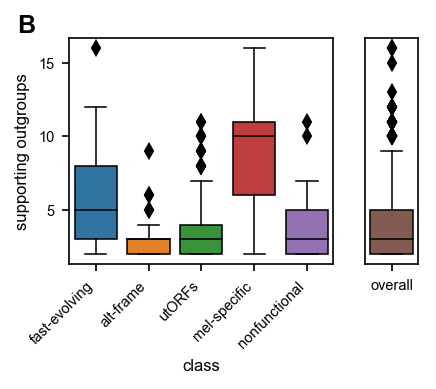

In [20]:
f = plt.figure(figsize=(3,2), dpi=150)
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.sca(ax0)
sns.boxplot(data=denovo[denovo.denovo].reset_index(), x='class', y='n_outgroup', palette = class_palette,
            order=['fast-evolving', 'alt-frame', 'utORFs', 'mel-specific', 'nonfunctional'],
           linewidth=.75)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('class', fontsize=8)
plt.ylabel('supporting outgroups', fontsize=8)
ax0.text(-0.13, 1, 'B', transform=plt.gca().transAxes,
      fontsize=12, fontweight='bold', va='bottom', ha='right')

ax1 = plt.subplot(gs[1])
plt.sca(ax1)
sns.boxplot(data=denovo[denovo.denovo].reset_index(), y='n_outgroup', color=sns.color_palette()[5],
           linewidth=.75)
ax1.get_yaxis().set_visible(False)
ax1.set_xticks([0])
ax1.set_xticklabels(['overall'], fontsize=7)

recolor_boxplot(ax0)
recolor_boxplot(ax1)
#plt.savefig('./elife-15_denovo_outgroups_finrev.pdf')
plt.show()

In [21]:
denovo.n_outgroup.groupby('class').apply(lambda x: x[x > 1].count() / x[x > 0].count())

class
alt-frame        0.660377
fast-evolving    0.837209
mel-specific     0.755102
nonfunctional    0.862069
utORFs           0.711321
Name: n_outgroup, dtype: float64

## n-supported counts

In [22]:
denovo.n_outgroup[denovo.n_outgroup > 2].count() / denovo.n_outgroup[denovo.n_outgroup > 1].count()

0.6781411359724613

In [23]:
denovo.n_outgroup[denovo.n_outgroup > 2].count()

394

In [24]:
denovo.n_outgroup[denovo.n_outgroup > 1].count()

581

## vw barplot figure and chi-sq stats

In [25]:
def _cumsum(l, step=.2):
    r = list()
    s = 0
    for i in l:
        s+= i
        s+= step
        r.append(s)
        
    return r

def _interpol(l):
    r = list()
    for i, item in enumerate(l):
        if i < len(l)-1:
            r.append((l[i] + l[i+1])/2)
    return r

def var_width_barplot(data, x, y, w, label, step=10, **kwargs):
    #label = x
    height = data[y].values
    bars = data[label].values
    width = data[w].values
    
    bar_pos = _interpol([0]+_cumsum(width, step=step))

    plt.bar(bar_pos, height, width=width, **kwargs)
    plt.xticks(bar_pos, bars)

    return plt.gca()

## panel A

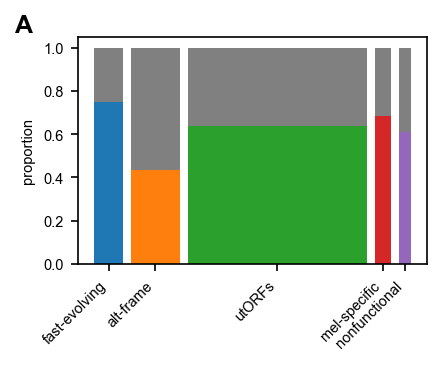

In [26]:
_ = (pd.DataFrame(denovo.reset_index().groupby('class').denovo.value_counts()).rename({'denovo':'count'}, axis=1)
 #.reset_index()
    .unstack(-1))
    #.pipe(lambda df: df.columns = ['one', 'two'])

_.columns = ['no', 'yes']

_ = _.assign(total = lambda df: df.no + df.yes,
             prop = lambda df: df.yes / df.total,
             invprop = lambda df: 1 - df.prop).reset_index()

plt.figure(figsize=(3,2), dpi=150)
var_width_barplot(_.iloc[[1,0,4,2,3]], 'class', 'prop', 'total', 'class', step=25,
                  color=[class_palette[i] for i in _.iloc[[1,0,4,2,3]]['class'].values],
                  linewidth=0
                 )
var_width_barplot(_.iloc[[1,0,4,2,3]], 'class', 'invprop', 'total', 'class', step=25,
                  bottom=_.iloc[[1,0,4,2,3]]['prop'], color='gray', 
                  linewidth=0
                 )
plt.xticks(rotation=45, horizontalalignment='right',
          fontsize=7)
plt.ylabel('proportion', fontsize=7)
plt.yticks(fontsize=7)
#plt.tight_layout()
#plt.ylim(0,1)

plt.gca().text(-0.13, 1, 'A', transform=plt.gca().transAxes,
      fontsize=12, fontweight='bold', va='bottom', ha='right')

#plt.savefig('./elife-15_denovo_classes_finrev.pdf')
plt.show()

In [27]:
_

,class,no,yes,total,prop,invprop
0,alt-frame,91,70,161,0.434783,0.565217
1,fast-evolving,24,72,96,0.750000,0.250000
2,mel-specific,17,37,54,0.685185,0.314815
3,nonfunctional,16,25,41,0.609756,0.390244
4,utORFs,214,377,591,0.637902,0.362098


In [28]:
_.iloc[[1,0,4,2,3]]

,class,no,yes,total,prop,invprop
1,fast-evolving,24,72,96,0.750000,0.250000
0,alt-frame,91,70,161,0.434783,0.565217
4,utORFs,214,377,591,0.637902,0.362098
2,mel-specific,17,37,54,0.685185,0.314815
3,nonfunctional,16,25,41,0.609756,0.390244


In [29]:
contingencytable = _[['class', 'no', 'yes']].set_index('class')

In [30]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

r = robjects.r

In [31]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    robjects.globalenv['contingencytable'] = robjects.conversion.py2rpy(contingencytable)

In [32]:
r_chisq = r('''chisq.test(contingencytable)''')

In [33]:
r('''show(contingencytable)''')

               no yes
alt-frame      91  70
fast-evolving  24  72
mel-specific   17  37
nonfunctional  16  25
utORFs        214 377


<rpy2.rinterface_lib.sexp.NULLType object at 0x7f937e9d2188> [RTYPES.NILSXP]

In [34]:
r('''show(chisq.test(contingencytable))''')


	Pearson's Chi-squared test

data:  contingencytable
X-squared = 31.941, df = 4, p-value = 1.967e-06



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f937e9d2188> [RTYPES.NILSXP]

In [35]:
for key in r_chisq.names: print(r_chisq.rx(key))

$statistic
X-squared 
 31.94084 


$parameter
df 
 4 


$p.value
[1] 1.967105e-06


$method
[1] "Pearson's Chi-squared test"


$data.name
[1] "contingencytable"


$observed
               no yes
alt-frame      91  70
fast-evolving  24  72
mel-specific   17  37
nonfunctional  16  25
utORFs        214 377


$expected
                     no       yes
alt-frame      61.80488  99.19512
fast-evolving  36.85260  59.14740
mel-specific   20.72959  33.27041
nonfunctional  15.73913  25.26087
utORFs        226.87381 364.12619


$residuals
                       no         yes
alt-frame      3.71363244 -2.93133286
fast-evolving -2.11717556  1.67117947
mel-specific  -0.81915362  0.64659386
nonfunctional  0.06575565 -0.05190381
utORFs        -0.85470219  0.67465390


$stdres
                       no         yes
alt-frame      5.19540211 -5.19540211
fast-evolving -2.84602554  2.84602554
mel-specific  -1.07482585  1.07482585
nonfunctional  0.08565514 -0.08565514
utORFs        -1.78224379  1.78224379


## denovo ingroup losses (panel C)

In [36]:
def check_phased_nonconserved_ingrp(series, thres, output='count'):
    reforder = ['dm', 'droSim', 'droSec', 'droYak',
       'droEre', 'droBia', 'droSuz',
       'droAna', 'droBip', 'droEug',
       'droEle', 'droKik', 'droTak',
       'droRho', 'droFic', 'droPse',
       'droPer', 'droMir', 'droWil',
       'droVir', 'droMoj', 'droAlb',
       'droGri', 
       'musDom', 'anoGam', 'apiMel', 'triCas']
        
    names = (series[series > thres]).index.values
    oldest = oldest_extant_relative(None, names)
    
    if oldest in reforder:
        idx_old = reforder.index(oldest)
    else:
        return -1
    
    ingroups = reforder[:idx_old+1]
    noncons = series[(series < thres) & (series > 0)].index.values
    present = [sp for sp in ingroups if sp in noncons]
    
    if output is 'count':
        return len(present)#, len(noncons)
    elif output is 'list':
        return present
    else:
        raise ValueError(output)
        
n_ingroups = single_blosum62_score_table.fillna(-1).apply(check_phased_nonconserved_ingrp, args=(2.5,) , axis=1)
n_ingroups.describe()

count    1020.000000
mean        3.995098
std         3.476682
min        -1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        17.000000
dtype: float64

In [37]:
denovo_ingrp = (pd.DataFrame(pd.concat([single_blosum62_score_table.reset_index().set_index('EBZid'), post_classes], axis=1, sort=True)
        .reset_index()
        .rename({'index':'EBZid', 0:'LCA_class', 'level_0':None}, axis=1)
        .set_index([None, 'uniqueid', 'validation', 'EBZid',  'midid'])
        .dropna(subset=['LCA_class'])
        .sort_values(by='LCA_class')
        .fillna(0).set_index('LCA_class', append=True)
        .pipe(lambda df: df[speciesorder])
        .apply(check_phased_nonconserved_ingrp, args=(2.5,) , axis=1)).reset_index()
         .set_index(['EBZid', 'LCA_class'])
         .drop(['level_0', 'uniqueid','validation','midid'], axis=1)
         .rename({0:'n_ingroup'}, axis=1)
    )
denovo_ingrp.index = denovo_ingrp.index.rename([None, 'class'])

denovo_ingrp = pd.merge(post_data, denovo_ingrp, left_index=True, right_index=True)
denovo_ingrp = denovo_ingrp.sort_index()
denovo_ingrp['denovo'] = denovo.denovo

In [38]:
denovo_ingrp.denovo.value_counts()

True     581
False    362
Name: denovo, dtype: int64

## panel C

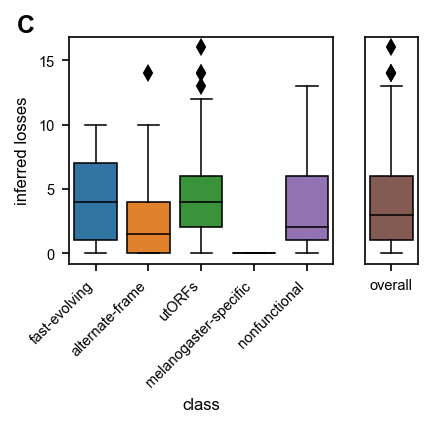

In [39]:
f = plt.figure(figsize=(3,2), dpi=150)
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
ax0 = plt.subplot(gs[0])
plt.sca(ax0)
sns.boxplot(data=denovo_ingrp[denovo_ingrp.denovo].reset_index(), x='class', y='n_ingroup', order = class_list,
            palette = class_palette, linewidth=.75)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('class', fontsize=8)
plt.ylabel('inferred losses', fontsize=8)

ax1 = plt.subplot(gs[1])
plt.sca(ax1)
sns.boxplot(data=denovo_ingrp[denovo_ingrp.denovo].reset_index(), y='n_ingroup', color=sns.color_palette()[5],
            linewidth=.75,
            )
ax1.get_yaxis().set_visible(False)
ax1.set_xticks([0])
ax1.set_xticklabels(['overall'], fontsize=7)

plt.sca(ax0)

labels = [item.get_text() for item in ax0.get_xticklabels()]
labels[1] = 'alternate-frame'
labels[3] = 'melanogaster-specific'
ax0.set_xticklabels(labels)

plt.gca().text(-0.13, 1, 'C', transform=plt.gca().transAxes,
      fontsize=12, fontweight='bold', va='bottom', ha='right')

recolor_boxplot(ax0)
recolor_boxplot(ax1)
#plt.savefig('./elife-15_denovo_internallosses.pdf')
plt.show()

In [40]:
denovo_ingrp.n_ingroup[(denovo_ingrp.n_ingroup > 0) & (denovo_ingrp.denovo)].count()

470

In [41]:
denovo_ingrp.denovo[denovo_ingrp.denovo].count()

581

In [42]:
denovo_ingrp.n_ingroup[(denovo_ingrp.n_ingroup > 0) & (denovo_ingrp.denovo)].count() / denovo_ingrp.denovo[denovo_ingrp.denovo].count()

0.8089500860585198